# Práctico 1

In [3]:
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn

In [7]:
seaborn.__version__

'0.9.0'

In [11]:
dataset = pandas.read_csv('hfi_cc_2018.csv')
dataset.shape

(1458, 123)

In [12]:
dataset.columns

Index(['year', 'ISO_code', 'countries', 'region', 'pf_rol_procedural',
       'pf_rol_civil', 'pf_rol_criminal', 'pf_rol', 'pf_ss_homicide',
       'pf_ss_disappearances_disap',
       ...
       'ef_regulation_business_bribes', 'ef_regulation_business_licensing',
       'ef_regulation_business_compliance', 'ef_regulation_business',
       'ef_regulation', 'ef_score', 'ef_rank', 'hf_score', 'hf_rank',
       'hf_quartile'],
      dtype='object', length=123)

In [13]:
important_cols = ['year', 'ISO_code', 'countries', 'region']

important_cols += [col for col in dataset.columns if 'pf_identity' in col]

important_cols += [
    'ef_score', # Economic Freedom (score)
    'ef_rank', # Economic Freedom (rank)
    'hf_score', # Human Freedom (score)
    'hf_rank', # Human Freedom (rank)
]

In [78]:
dataset[important_cols]

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,ef_score,ef_rank,hf_score,hf_rank
0,2016,ALB,Albania,Eastern Europe,0.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,6.250000,7.54,34.0,7.568140,48.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,0.0,5.0,2.5,0.0,0.0,0.0,0.0,0.833333,4.99,159.0,5.135886,155.0
2,2016,AGO,Angola,Sub-Saharan Africa,10.0,10.0,10.0,10.0,0.0,0.0,0.0,10.0,7.500000,5.17,155.0,5.640662,142.0
3,2016,ARG,Argentina,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,4.84,160.0,6.469848,107.0
4,2016,ARM,Armenia,Caucasus & Central Asia,7.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,8.000000,7.57,29.0,7.241402,57.0
5,2016,AUS,Australia,Oceania,7.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,9.250000,7.98,10.0,8.582219,4.0
6,2016,AUT,Austria,Western Europe,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,7.58,27.0,8.413474,16.0
7,2016,AZE,Azerbaijan,Caucasus & Central Asia,0.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,6.250000,6.49,106.0,6.083277,130.0
8,2016,BHS,Bahamas,Latin America & the Caribbean,NaN,10.0,10.0,10.0,10.0,10.0,10.0,NaN,10.000000,7.34,49.0,7.397269,50.0
9,2016,BHR,Bahrain,Middle East & North Africa,NaN,0.0,0.0,0.0,10.0,10.0,10.0,0.0,3.333333,7.56,30.0,6.848035,75.0


## 1. Estadísticos descriptivos


### 1.1 Para comenzar con un pantallazo de los datos, calcular el rango de las variables.

In [54]:
#pip install rpy2
#import rpy2
#%%R
#library(ggplot2)

maximo= dataset[important_cols].max()[4:]
minimo= dataset[important_cols].min()[4:]
rango=maximo-minimo
print(rango)

pf_identity_legal                     10
pf_identity_parental_marriage         10
pf_identity_parental_divorce          10
pf_identity_parental                  10
pf_identity_sex_male                  10
pf_identity_sex_female                10
pf_identity_sex                       10
pf_identity_divorce                   10
pf_identity                           10
ef_score                            6.31
ef_rank                              161
hf_score                         5.36049
hf_rank                              161
dtype: object


### 1.2 Obtener media, mediana y desviación estándar de las variables *pf_identity* y *hf_score* en el mundo y compararla con la de Latinoamérica y el caribe. ¿Tiene sentido calcular la moda?

In [76]:
media=dataset[important_cols][["pf_identity", "hf_score"]].mean()
mediana=dataset[important_cols][["pf_identity", "hf_score"]].median()
DS=dataset[important_cols][["pf_identity", "hf_score"]].std()

print(media, mediana, DS)



pf_identity    7.334180
hf_score       6.993444
dtype: float64 pf_identity    9.166667
hf_score       6.923840
dtype: float64 pf_identity    3.159473
hf_score       1.025811
dtype: float64


In [77]:
filtro=dataset[important_cols]["region"]=="Latin America & the Caribbean"
mediaAL=dataset[filtro][["pf_identity", "hf_score"]].mean()
medianaAL=dataset[filtro][["pf_identity", "hf_score"]].median()
DSAL=dataset[filtro][["pf_identity", "hf_score"]].std()

print(mediaAL, medianaAL, DSAL)




pf_identity    8.765086
hf_score       7.047982
dtype: float64 pf_identity    10.000000
hf_score        7.028045
dtype: float64 pf_identity    1.711732
hf_score       0.608904
dtype: float64


,pf_identity,hf_score
count,232.000000,232.000000
mean,8.765086,7.047982
std,1.711732,0.608904
min,5.000000,4.200724
25%,7.500000,6.779311
50%,10.000000,7.028045
75%,10.000000,7.339903
max,10.000000,8.290152


Tanto el promedio como la mediana de pf_identity de América Latina son bastante superiores a los del Mundo. Para la variable hf_score, también se da que tanto el promedio como la mediana de América Latina supera a los valores mundiales, pero en este caso las diferencias son mas reducidas. Las desviaciones estándar de América Latina son inferiores a las mundiales en ambas variables. Por lo tanto los coeficientes de variación (al ser mayores las medias, e inferiores las desviaciones estándar) son menores es América Latina, por lo que las distribuciones de las variables son más homogéneas que en el Mundo.

La moda no resultará muy útil porque ambas variables asumen muchos valores distintos. En tal situación en todo caso es conveniente agrupar los datos en distribuciones por intervalo y obtener los intervalos modales.

###  1.3 ¿Son todos los valores de *pf_identity*  y *hf_score* directamente comparables? ¿Qué otra variable podría influenciarlos?

Hay dos formas de interpretar esta consigna. Si se entiende que se pregunta si se pueden comparar ambas variables, la respuesta es que ambas son comparables dados que se trata de índices, uno de los cuales es más general que el otro. Entonces una divergencia entre los mismos será debida a los otros factores que incluye el índice mas general.
Otra forma de interpretar la consigna es que se pretende ver si los valores de cada variable son comparables entre sí, a lo cual se puede responder que si, pero con cautela dado que hay otras variables en juego, como el año de cada medición y el país. 

 ### 1.4 ¿Cómo pueden sanearse los valores faltantes?

Para el análisis exploratorio conviene trabajarlos simplemente como faltantes. 
Luego, para aplicar métodos que no admitan valores faltantes, se podría acudir oportunamente a algún algoritmo de imputación.

### 1.5 ¿Encuentra outliers en estas dos variables? ¿Qué método utiliza para detectarlos? ¿Los outliers, son globales o por grupo? ¿Los eliminaría del conjunto de datos?

Primero veamos los boxplots de ambas distribuciones para identificar si existen outliers globales. Para complementar el análisis también se pueden ver las estadísticas descriptivas.

In [ ]:
En el caso de pf_identity se tiene:

count    1378.000000
mean        7.334180
std         3.159473
min         0.000000
25%         5.000000
50%         9.166667
75%        10.000000
max        10.000000
Name: pf_identity, dtype: float64

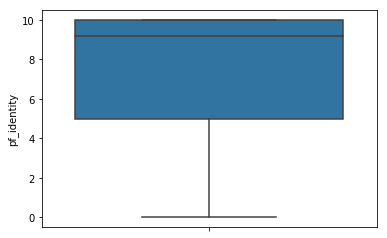

In [84]:
seaborn.boxplot(data=dataset[important_cols], y=dataset[important_cols]["pf_identity"])
dataset[important_cols]["pf_identity"].describe()

El criterio estándar de determinación detección de los outliers es si hay observaciones que superan en mas de 1,5 recorridos intercuartílicos al tercer cuartil, o son inferiores en mas de 1,5 recorridos intercuartílicos que el primer cuartil.
Puede notarse que no hay outliers golobales en la variable pf_identity. Ene este caso el máximo coincide con el tercer cuartil y el mínimo no es menor a  $5- 1,5 \times (9.17 - 5)$. 

count    1378.000000
mean        6.993444
std         1.025811
min         3.765827
25%         6.336685
50%         6.923840
75%         7.894660
max         9.126313
Name: hf_score, dtype: float64

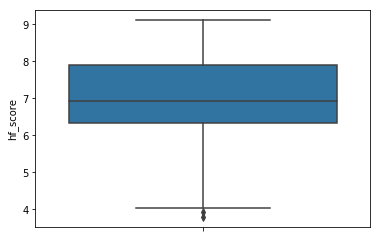

In [85]:
seaborn.boxplot(data=dataset[important_cols], y=dataset[important_cols]["hf_score"])
dataset[important_cols]["hf_score"].describe()

La variable hf_score si tiene outliers, dado que al menos dos valores de la misma son inferiores a  $6.336685 - 1,5 \times (7.894660 - 6.336685)$.

Al graficar boxplots de ambas variables por regiones se puede ver si hay valores atípicos regionales.

Para decidir si se eliminan o no los valores atípicos se debe meditar sobre cuál es la finalidad de la investigación. En ciertos casos, al dropear un outlier en forma arbitraria se puede estar eliminando información importante. En otros casos se los debe eliminar para obtener conclusiones válidas para la mayoría de la distribución, evitando que las etimaciones se vean distorsionadas por unos pocos valores inusuales.